# Project:  No-show appointments Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> **ScheduledDay**: tells us on what day the patient set up their appointment. 
>
> **Neighborhood**: indicates the location of the hospital.
>
> **Scholarship**: indicates whether or not the patient is enrolled in Brasilian welf program.
>
>**No-show**: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### My Questions :

>**Question 1 : Is the alcoholism associated with no show ?**
>
>**Question 2 Is receive sms associated with no show ?**
>
>**Question 3 Is the Age associated with no show ?**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [5]:
#read the data from the csv file and print out a few lines
df=pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.shape

(110527, 14)

**There is 110527 row and 14 column**

In [7]:
#check if there is a dublicate value in the dataset
sum(df.duplicated(subset=None, keep='first'))

0

>**there is no dublicated rows in the dataset to drop**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Observation
1. there is no null value in the dataset.
2. the No-show column is an object i need to convert it to int to work with it.
3. there is no need to patient id and neighbourhood since they are specific to the patient and there is no 2 patients have the same values.

In [9]:
# dropping the PatientId and Neighbourhood columns since i wont need them in my finding.
df.drop(['PatientId','Neighbourhood'],axis=1,inplace=True)
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [10]:
#change the no show to numeric values for simplicity in observation
df['No-show'].replace(('Yes', 'No'), (1, 0), inplace=True)
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,0
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,0
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,0
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,0
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,0


In [11]:
#correct some column name and convert some to lowercase to make it easy while writing the code
df.columns =['appt_id','gender','sched_day','appt_day','age','scholarship','hypertension',
            'diabetes','alcoholism','handicap','rec_sms','no_show']

In [12]:
#observation of the dataset
df.describe()

,appt_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,rec_sms,no_show
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### Observation 

1. the minimum age is -1 which is impossible because the age supposed to be > 0
2. the maximum age ia 115 but after searching in the web the avrage maximum is between 100-110
3. the average age of the patients is 37
4. most of the sample were older since 75% of the patients aged 55 
5. 9.8% of the patients does not have scholarship 
6. 19% of the patients have hypertension and 7% has diabetes 
7. 3% of the patient is alcholism and 2% is hanicap 

In [13]:
#Find the patient that has age = -1
sum(df['age'] < 0)

1

>**there is one patient who has age = -1**

In [14]:
#Find the patient that has age = 115 
sum(df['age'] > 110 )

5

>**there are 5 patients who has age > 110**

In [15]:
#finding the percentage of patients who show up to their appointment and who doesn't show
showPrec = int((sum(df['no_show'] == 0 ) / 110527) * 100)
noShowPrec = int((sum(df['no_show']== 1 ) / 110527) * 100)

print('The percentage of patients showing up is {}% while not showing up is {}%'.format(showPrec,noShowPrec))

The percentage of patients showing up is 79% while not showing up is 20%


<a id='eda'></a>
## Exploratory Data Analysis

>**no-show is my dependent variable and all the others are independent**

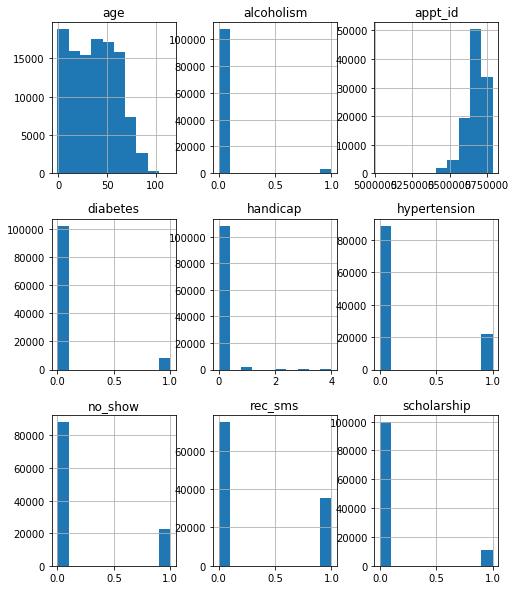

In [16]:
df.hist(figsize=(8,10));

1. we can see that the alcoholism patient is a small portion of the sample
2. we can see that our observation for no show is correct since most of the sample show up to the appointment 

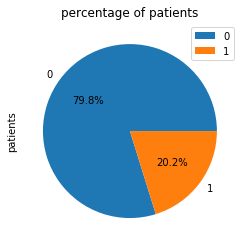

In [39]:
#plot the patients to see the status if show or no more easier
pieChart = allP.plot.pie(figsize=(4,4), autopct='%1.1f%%');
plt.legend();
plt.title('percentage of patients')
plt.ylabel('patients');

### observation
**The plot shows that 79% of the patient show up while 20% doesn't**

### Question 1 : Is the alcoholism associated with no show ?
> **my assumption would be that if the patient is alcoholism then most likely they will not show up to their appointment**

In [17]:
#initilize dependent variable to use through out the analysis 
show = df.no_show == 0 
noShow = df.no_show == 1

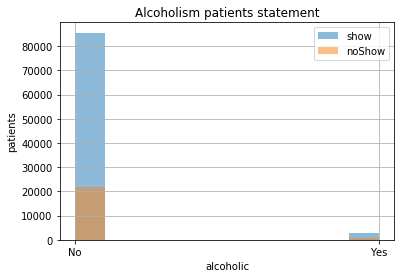

In [18]:
#plot the relationship between the alcholism and no show to see if my assumption is correct or not
df.alcoholism[show].hist(alpha=0.5,label='show')
df.alcoholism[noShow].hist(alpha=0.5,label='noShow');
plt.legend();
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.title('Alcoholism patients statement')
plt.xlabel('alcoholic')
plt.ylabel('patients');


### observation
**The plot isn't meeting my assumption since more of the alcoholic patient is showing up to their appointment**

### Question 2  Is receive sms associated with no show ?

>**my second assuption is if the patient receive sms they will show up to their appointment**

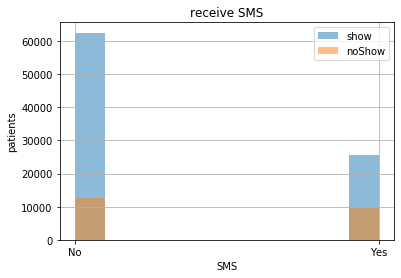

In [20]:
#plot the relationship between rec sms and no show to see if my assumption is correct or not
df.rec_sms[show].hist(alpha=0.5,label='show')
df.rec_sms[noShow].hist(alpha=0.5,label='noShow');
plt.legend();
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.title('receive SMS')
plt.xlabel('SMS')
plt.ylabel('patients');

### observation
**The plot is meeting my assumption since more of the patients who receive sms show up to their appointment. Also, sending an SMS isn't necessarily a factor to make sure the patient showed up**

### Question 3  Is the Age associated with no show ?

**my assumption is the older the patient is the more they miss their oppintment**

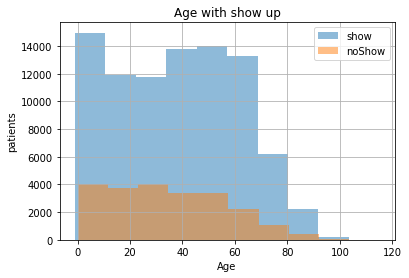

In [21]:
#plot the relationship between the age and no show to see if my assumption is correct or not
df.age[show].hist(alpha=0.5,label='show')
df.age[noShow].hist(alpha=0.5,label='noShow');
plt.legend();
plt.title('Age with show up')
plt.xlabel('Age')
plt.ylabel('patients');

### observation
**The plot show a strong realtionship between the two factor age and show up and meeting my assumption the older the patients is the more likely they miss their appointment**

<a id='conclusions'></a>
## Conclusions

### my over all conclusion

1. More patient looks like they are showing up with the percentage of 79% to their appointment than no showing up with the percentage 20%.
2. The factor that affect the show up is the age.
3. Most of the independent variable were a yes no which is lead to unclear relationship between the independet and dependent variable 
4. Sending an SMS isn't necessarily a factor to make sure the patient showed up
5. Alcoholic patient is showing up to their appointment more than not showing up 
